<a href="https://colab.research.google.com/github/imran-ANU/labour_market/blob/main/Labour_Market_AU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***.............Library Import................***

In [12]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

## ***Excel sheet load from an excel file Australian Labour Market Information Portal "https://lmip.gov.au/default.aspx?LMIP/Downloads/EmploymentRegion"***

In [13]:
df = pd.read_excel('https://lmip.gov.au/PortalFile.axd?FieldID=3195463&.xlsx', sheet_name='SA4 Regions',names=['region', 'state_territory', 'date','unemployment_rate','participation_rate','employment_rate'],header=0)
#somehow renaming command is not working therefore it is used at the initial stage

# ***........Data type clean, check, format............***

In [14]:
df.head(5) # data table print

,region,state_territory,date,unemployment_rate,participation_rate,employment_rate
0,Adelaide North,SA,2006-11-01,5.9,61.5,69.2
1,Adelaide North,SA,2006-12-01,6.0,61.7,69.2
2,Adelaide North,SA,2007-01-01,6.2,61.8,69.2
3,Adelaide North,SA,2007-02-01,6.2,61.8,69.2
4,Adelaide North,SA,2007-03-01,6.2,61.7,69.1


In [15]:
df.dtypes # data types of the column

region                        object
state_territory               object
date                  datetime64[ns]
unemployment_rate            float64
participation_rate           float64
employment_rate              float64
dtype: object

In [16]:
df.shape # shape of the data file

(8145, 6)

In [17]:
df.isnull().sum().any() #Null value check

False

In [18]:
df['date'] = df['date'].dt.strftime('%B %Y') #time frame change like as original

In [19]:
df.date

0        November 2006
1        December 2006
2         January 2007
3        February 2007
4           March 2007
             ...      
8140         July 2021
8141       August 2021
8142    September 2021
8143      October 2021
8144     November 2021
Name: date, Length: 8145, dtype: object

In [20]:
df

,region,state_territory,date,unemployment_rate,participation_rate,employment_rate
0,Adelaide North,SA,November 2006,5.9,61.5,69.2
1,Adelaide North,SA,December 2006,6.0,61.7,69.2
2,Adelaide North,SA,January 2007,6.2,61.8,69.2
3,Adelaide North,SA,February 2007,6.2,61.8,69.2
4,Adelaide North,SA,March 2007,6.2,61.7,69.1
...,...,...,...,...,...,...
8140,Wivenhoe,QLD,July 2021,7.7,68.4,71.2
8141,Wivenhoe,QLD,August 2021,7.6,68.7,71.7
8142,Wivenhoe,QLD,September 2021,7.5,68.8,71.9
8143,Wivenhoe,QLD,October 2021,7.2,68.6,72.1


# ***..........DATA Separation according to STATE/TERRITORY............***

In [21]:
df_SA = df[df.state_territory.eq('SA')] # separating data according to State
df_VIC = df[df.state_territory.eq('VIC')] # separating data according to State
df_QLD = df[df.state_territory.eq('QLD')] # separating data according to State
df_ACT = df[df.state_territory.eq('NSW/ACT')] # separating data according to State
df_NSW = df[df.state_territory.eq('NSW')] # separating data according to State
df_NT = df[df.state_territory.eq('NT')] # separating data according to State
df_WA = df[df.state_territory.eq('WA')] # separating data according to State
df_TAS = df[df.state_territory.eq('TAS')] # separating data according to State

In [22]:
df_ACT.tail (5)

,region,state_territory,date,unemployment_rate,participation_rate,employment_rate
1443,Capital Region,NSW/ACT,July 2021,4.3,67.5,77.2
1444,Capital Region,NSW/ACT,August 2021,4.3,67.2,76.9
1445,Capital Region,NSW/ACT,September 2021,4.4,66.9,76.6
1446,Capital Region,NSW/ACT,October 2021,4.6,66.5,76.0
1447,Capital Region,NSW/ACT,November 2021,4.6,66.2,75.7


In [23]:
df_NT.shape

(181, 6)

# ***.......Simple Plotting for analysis........***

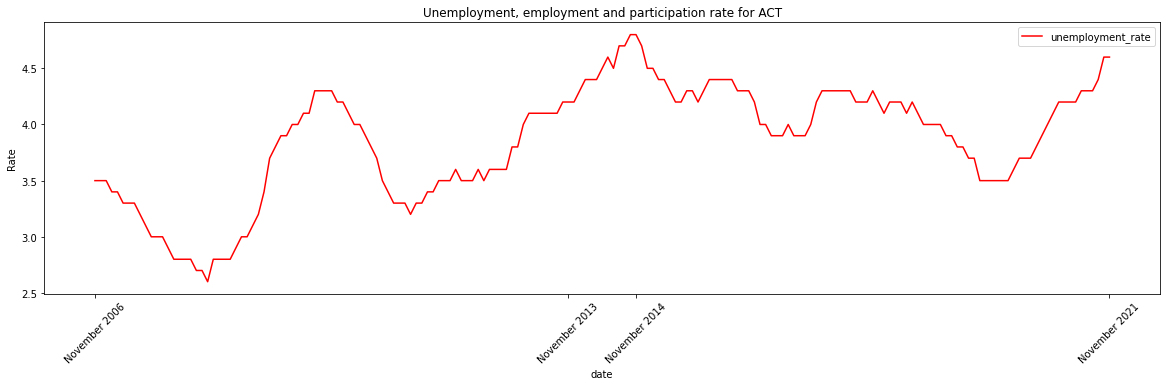

In [24]:
plt.figure(figsize=(20,5))
x_ticks = ['November 2006' ,'November 2013','November 2014','November 2021']
x_labels =['November 2006' ,'November 2013','November 2014','November 2021']
plt.title('Unemployment, employment and participation rate for ACT')
plt.plot(df_ACT['date'],df_ACT['unemployment_rate'],'r',label='unemployment_rate',)
#plt.plot(df_ACT['date'],df_ACT['employment_rate'],'g',label='employment_rate')
#plt.plot(df_ACT['date'],df_ACT['participation_rate'],'b',label='participation_rate')
plt.xlabel('date')
plt.ylabel('Rate')
leg = plt.legend();
plt.xticks(ticks=x_ticks, labels=x_labels,rotation=45)
plt.show()

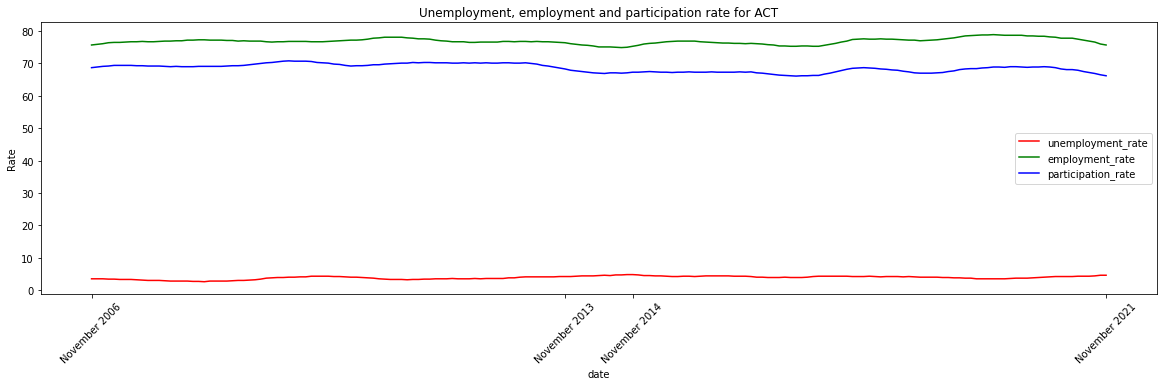

In [25]:
plt.figure(figsize=(20,5))
x_ticks = ['November 2006' ,'November 2013','November 2014','November 2021']
x_labels =['November 2006' ,'November 2013','November 2014','November 2021']
plt.title('Unemployment, employment and participation rate for ACT')
plt.plot(df_ACT['date'],df_ACT['unemployment_rate'],'r',label='unemployment_rate',)
plt.plot(df_ACT['date'],df_ACT['employment_rate'],'g',label='employment_rate')
plt.plot(df_ACT['date'],df_ACT['participation_rate'],'b',label='participation_rate')
plt.xlabel('date')
plt.ylabel('Rate')
leg = plt.legend();
plt.xticks(ticks=x_ticks, labels=x_labels,rotation=45)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


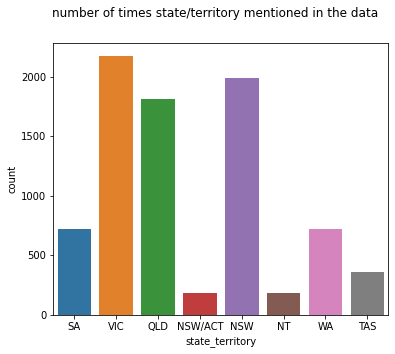

In [26]:
fig = plt.figure(figsize=(6, 5))
fig.suptitle('number of times state/territory mentioned in the data')
sb.countplot(df.state_territory) #number of times state/territory mentioned in the data

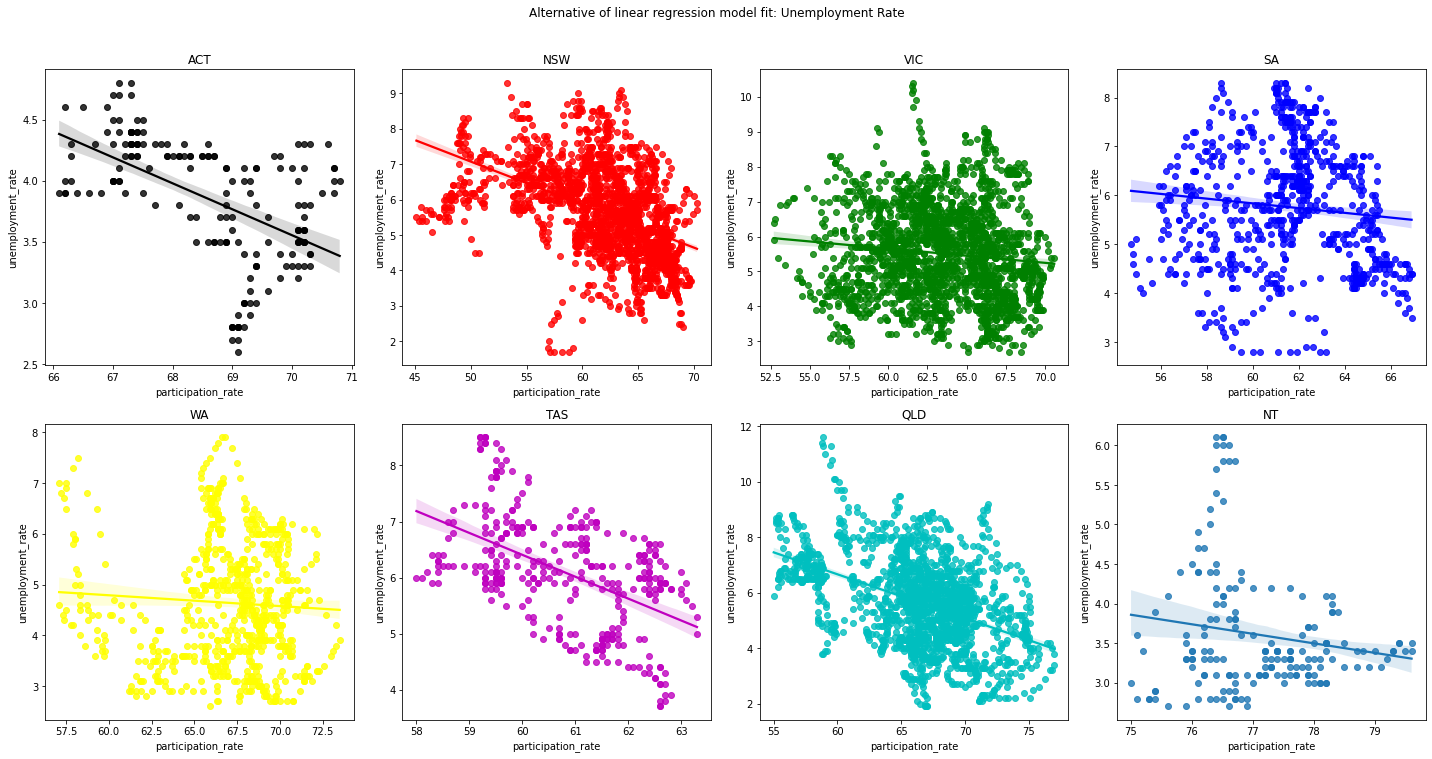

In [27]:
fig, axes = plt.subplots(2, 4,figsize=(20,10))
fig.suptitle('Alternative of linear regression model fit: Unemployment Rate',y=1.05)

sb.regplot(x = df_ACT.participation_rate, y = df_ACT.unemployment_rate,ax=axes[0,0],color='black').set_title('ACT')
sb.regplot(x = df_NSW.participation_rate, y = df_NSW.unemployment_rate,ax=axes[0,1],color='red').set_title('NSW')
sb.regplot(x = df_VIC.participation_rate, y = df_VIC.unemployment_rate,ax=axes[0,2],color='green').set_title('VIC')
sb.regplot(x = df_SA.participation_rate, y = df_SA.unemployment_rate,ax=axes[0,3],color='blue').set_title('SA')
sb.regplot(x = df_WA.participation_rate, y = df_WA.unemployment_rate,ax=axes[1,0],color='yellow').set_title('WA')
sb.regplot(x = df_TAS.participation_rate, y = df_TAS.unemployment_rate,ax=axes[1,1],color='m').set_title('TAS')
sb.regplot(x = df_QLD.participation_rate, y = df_QLD.unemployment_rate,ax=axes[1,2],color='c').set_title('QLD')
sb.regplot(x = df_NT.participation_rate, y = df_NT.unemployment_rate,ax=axes[1,3]).set_title('NT')

plt.tight_layout()


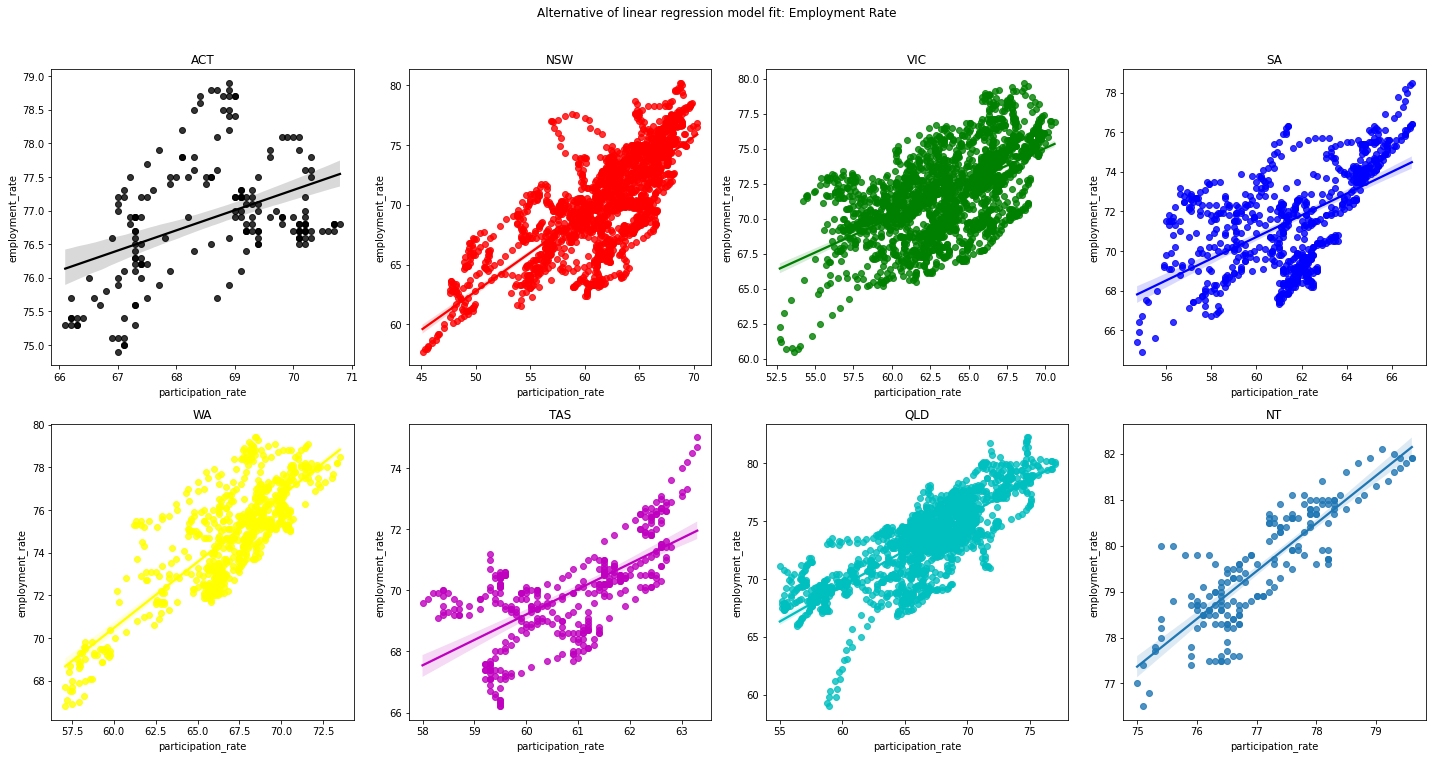

In [28]:
fig, axes = plt.subplots(2, 4,figsize=(20,10))
fig.suptitle('Alternative of linear regression model fit: Employment Rate',y=1.05)

sb.regplot(x = df_ACT.participation_rate, y = df_ACT.employment_rate,ax=axes[0,0],color='black').set_title('ACT')
sb.regplot(x = df_NSW.participation_rate, y = df_NSW.employment_rate,ax=axes[0,1],color='red').set_title('NSW')
sb.regplot(x = df_VIC.participation_rate, y = df_VIC.employment_rate,ax=axes[0,2],color='green').set_title('VIC')
sb.regplot(x = df_SA.participation_rate, y = df_SA.employment_rate,ax=axes[0,3],color='blue').set_title('SA')
sb.regplot(x = df_WA.participation_rate, y = df_WA.employment_rate,ax=axes[1,0],color='yellow').set_title('WA')
sb.regplot(x = df_TAS.participation_rate, y = df_TAS.employment_rate,ax=axes[1,1],color='m').set_title('TAS')
sb.regplot(x = df_QLD.participation_rate, y = df_QLD.employment_rate,ax=axes[1,2],color='c').set_title('QLD')
sb.regplot(x = df_NT.participation_rate, y = df_NT.employment_rate,ax=axes[1,3]).set_title('NT')

plt.tight_layout()

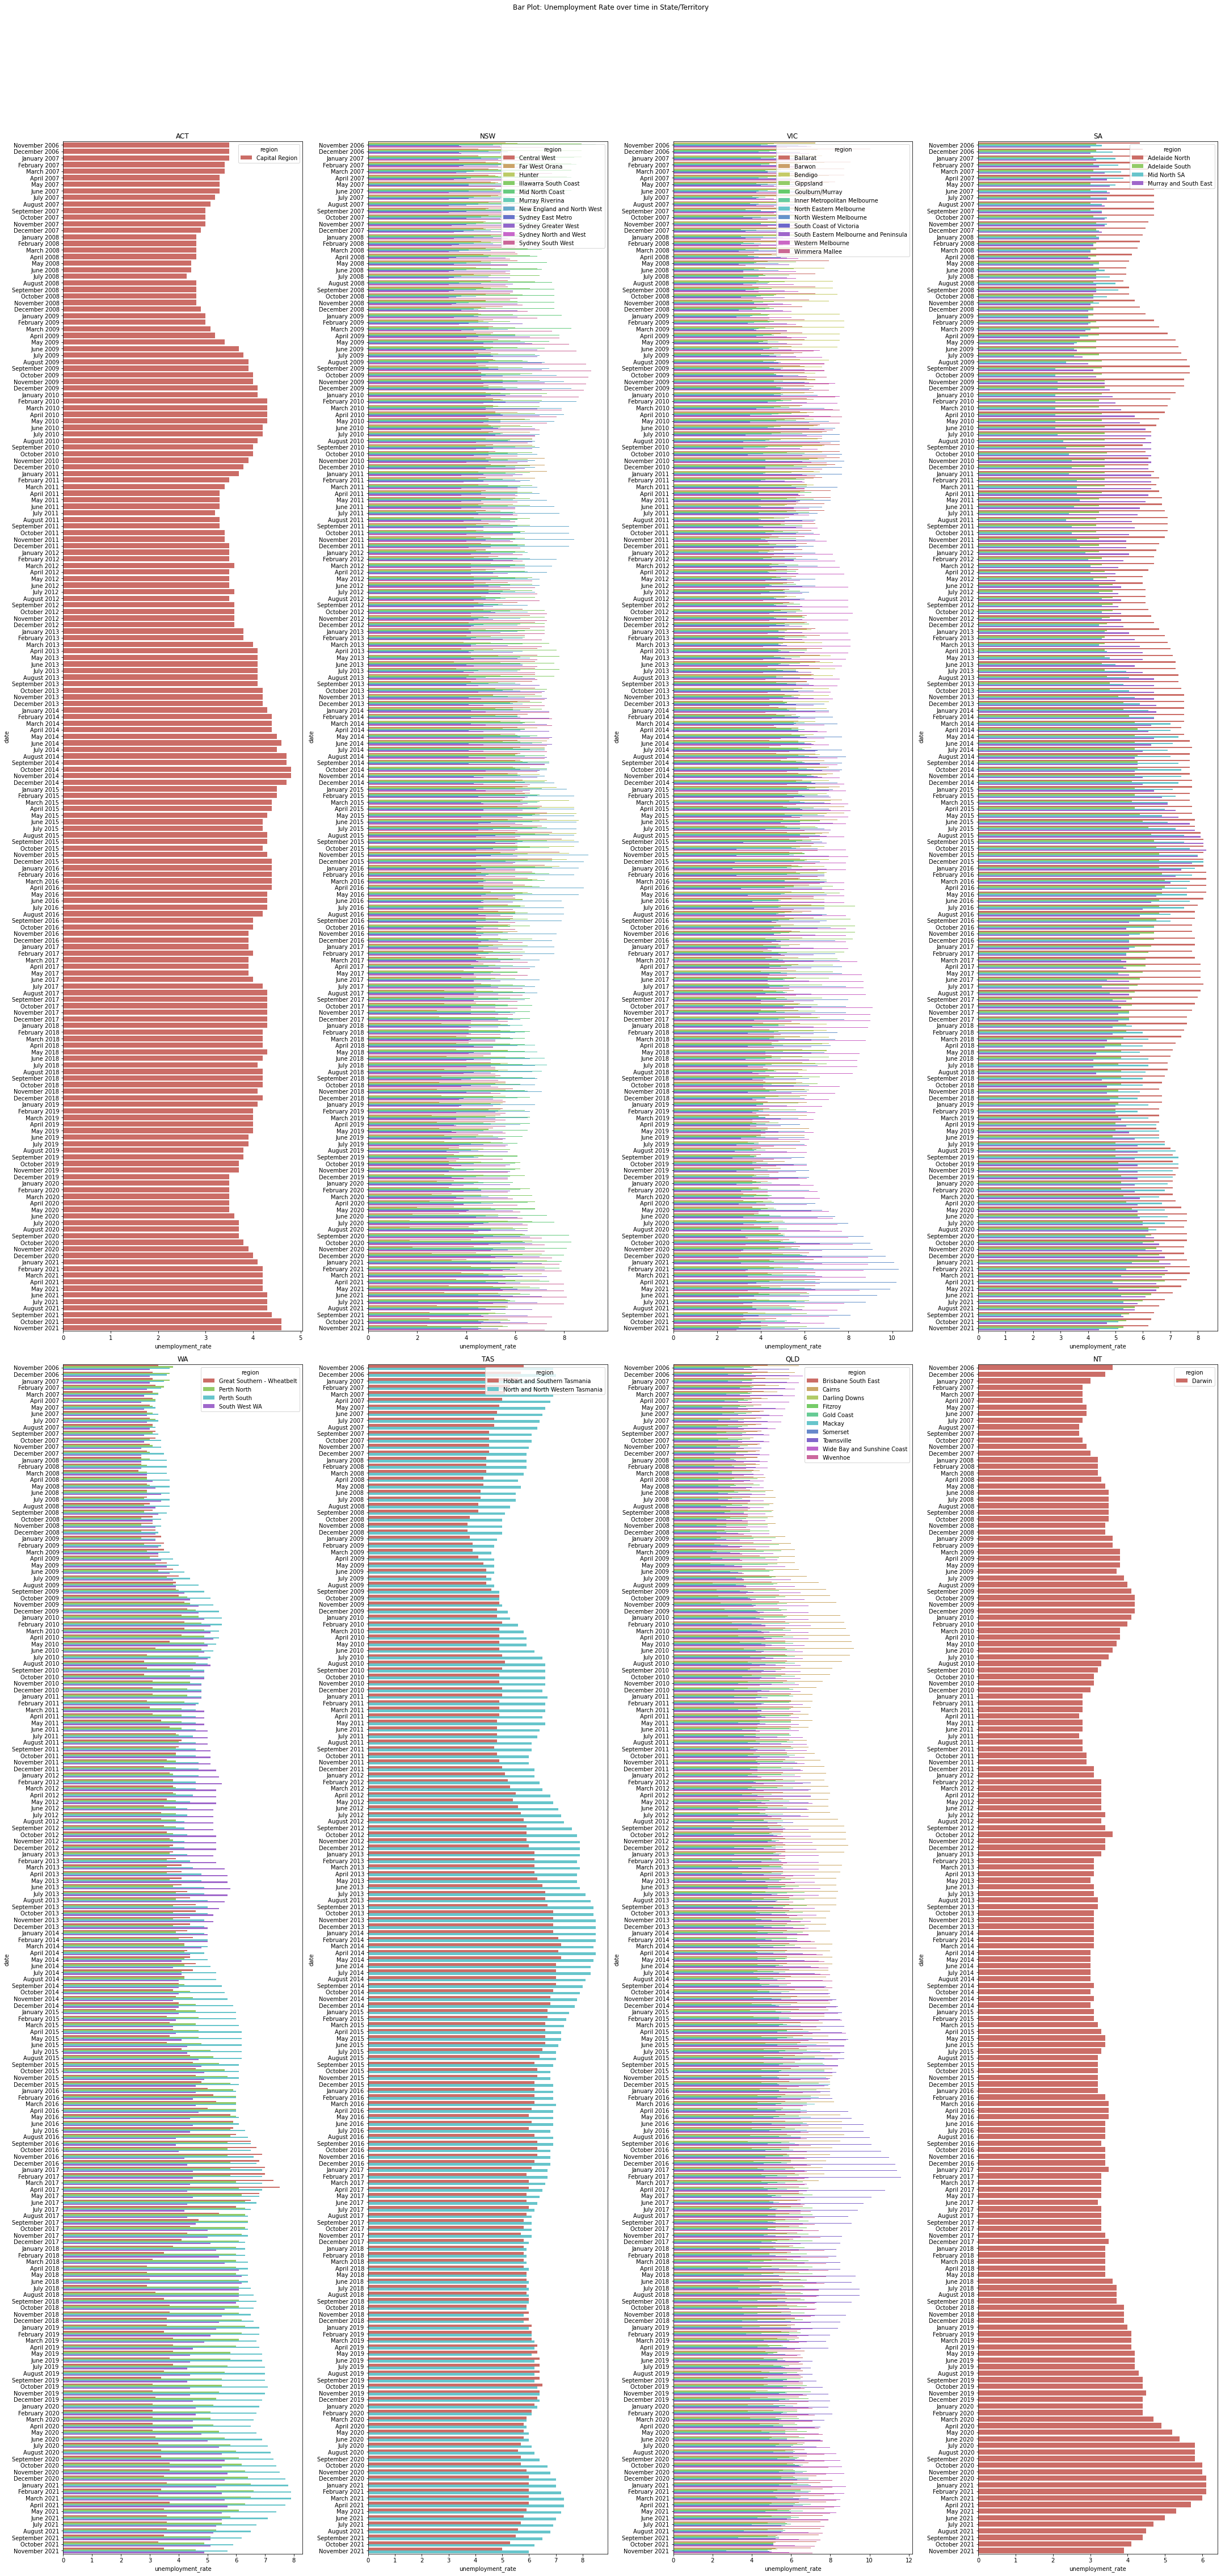

In [ ]:
fig, axes = plt.subplots(2, 4,figsize=(30,60))
fig.suptitle('Bar Plot: Unemployment Rate over time in State/Territory',y=1.05)

sb.barplot(x = 'unemployment_rate', y = 'date', hue='region', data=df_ACT, ax=axes[0,0],palette = 'hls').set_title('ACT')
sb.barplot(x = 'unemployment_rate', y = 'date', hue='region', data=df_NSW, ax=axes[0,1],palette = 'hls').set_title('NSW')
sb.barplot(x = 'unemployment_rate', y = 'date', hue='region', data=df_VIC, ax=axes[0,2],palette = 'hls').set_title('VIC')
sb.barplot(x = 'unemployment_rate', y = 'date', hue='region', data=df_SA, ax=axes[0,3],palette = 'hls').set_title('SA')
sb.barplot(x = 'unemployment_rate', y = 'date', hue='region', data=df_WA, ax=axes[1,0],palette = 'hls').set_title('WA')
sb.barplot(x = 'unemployment_rate', y = 'date', hue='region', data=df_TAS, ax=axes[1,1],palette = 'hls').set_title('TAS')
sb.barplot(x = 'unemployment_rate', y = 'date', hue='region', data=df_QLD, ax=axes[1,2],palette = 'hls').set_title('QLD')
sb.barplot(x = 'unemployment_rate', y = 'date', hue='region', data=df_NT, ax=axes[1,3],palette = 'hls').set_title('NT')

plt.tight_layout()

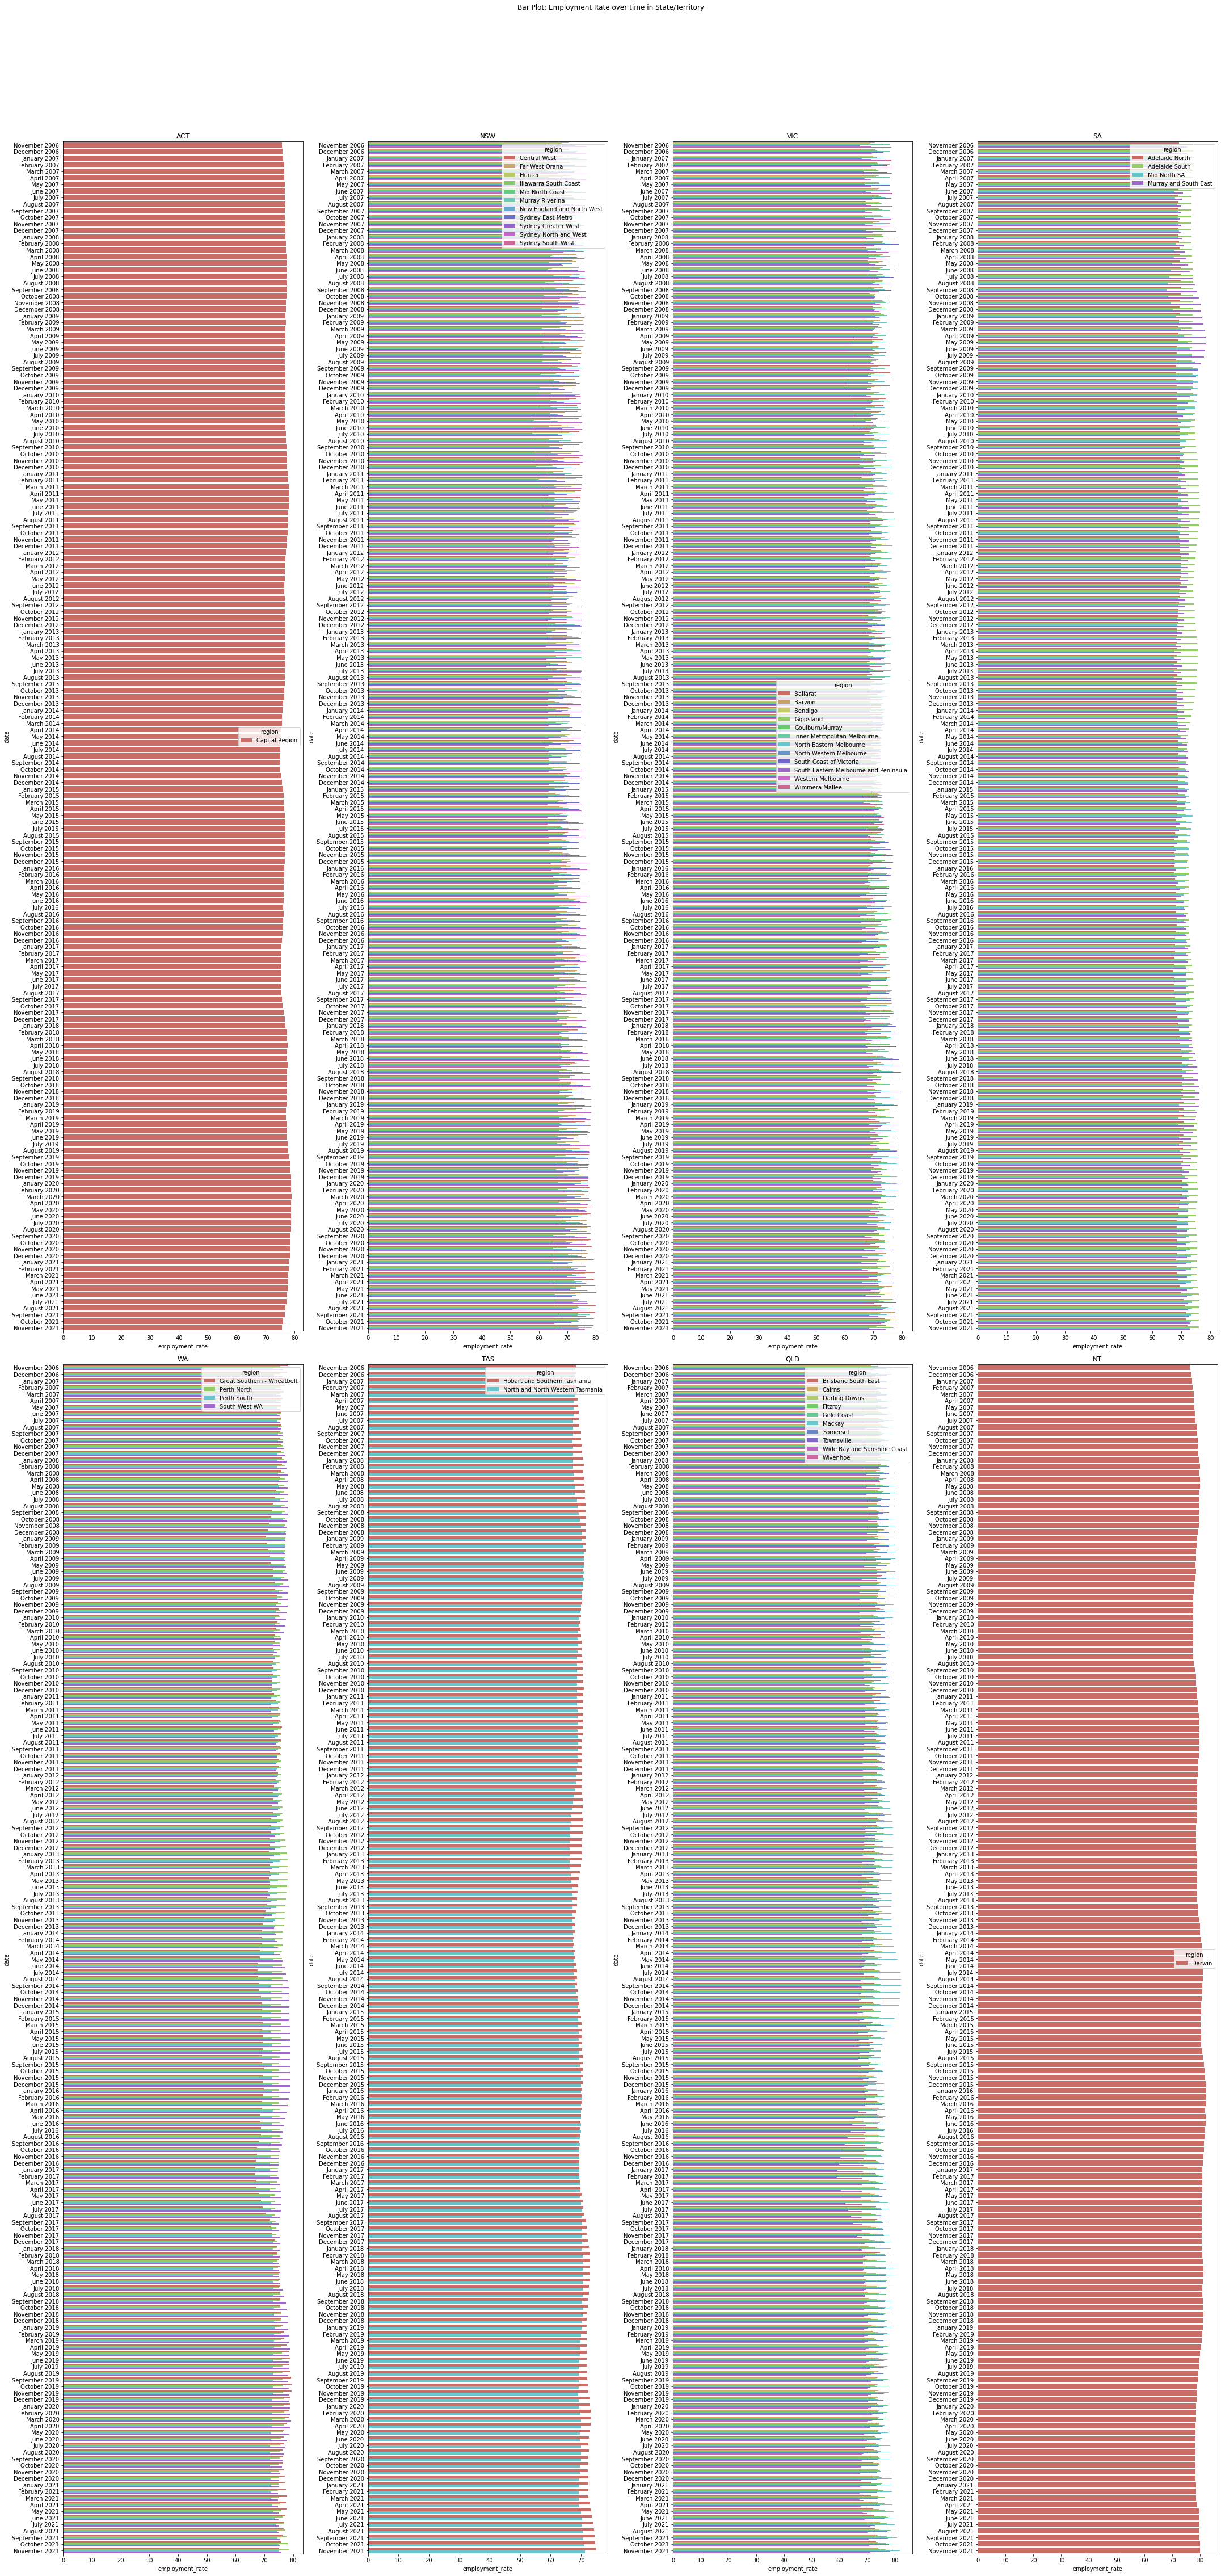

In [ ]:
fig, axes = plt.subplots(2, 4,figsize=(30,60))
fig.suptitle('Bar Plot: Employment Rate over time in State/Territory',y=1.05)

sb.barplot(x = 'employment_rate', y = 'date', hue='region', data=df_ACT, ax=axes[0,0],palette = 'hls').set_title('ACT')
sb.barplot(x = 'employment_rate', y = 'date', hue='region', data=df_NSW, ax=axes[0,1],palette = 'hls').set_title('NSW')
sb.barplot(x = 'employment_rate', y = 'date', hue='region', data=df_VIC, ax=axes[0,2],palette = 'hls').set_title('VIC')
sb.barplot(x = 'employment_rate', y = 'date', hue='region', data=df_SA, ax=axes[0,3],palette = 'hls').set_title('SA')
sb.barplot(x = 'employment_rate', y = 'date', hue='region', data=df_WA, ax=axes[1,0],palette = 'hls').set_title('WA')
sb.barplot(x = 'employment_rate', y = 'date', hue='region', data=df_TAS, ax=axes[1,1],palette = 'hls').set_title('TAS')
sb.barplot(x = 'employment_rate', y = 'date', hue='region', data=df_QLD, ax=axes[1,2],palette = 'hls').set_title('QLD')
sb.barplot(x = 'employment_rate', y = 'date', hue='region', data=df_NT, ax=axes[1,3],palette = 'hls').set_title('NT')

plt.tight_layout()

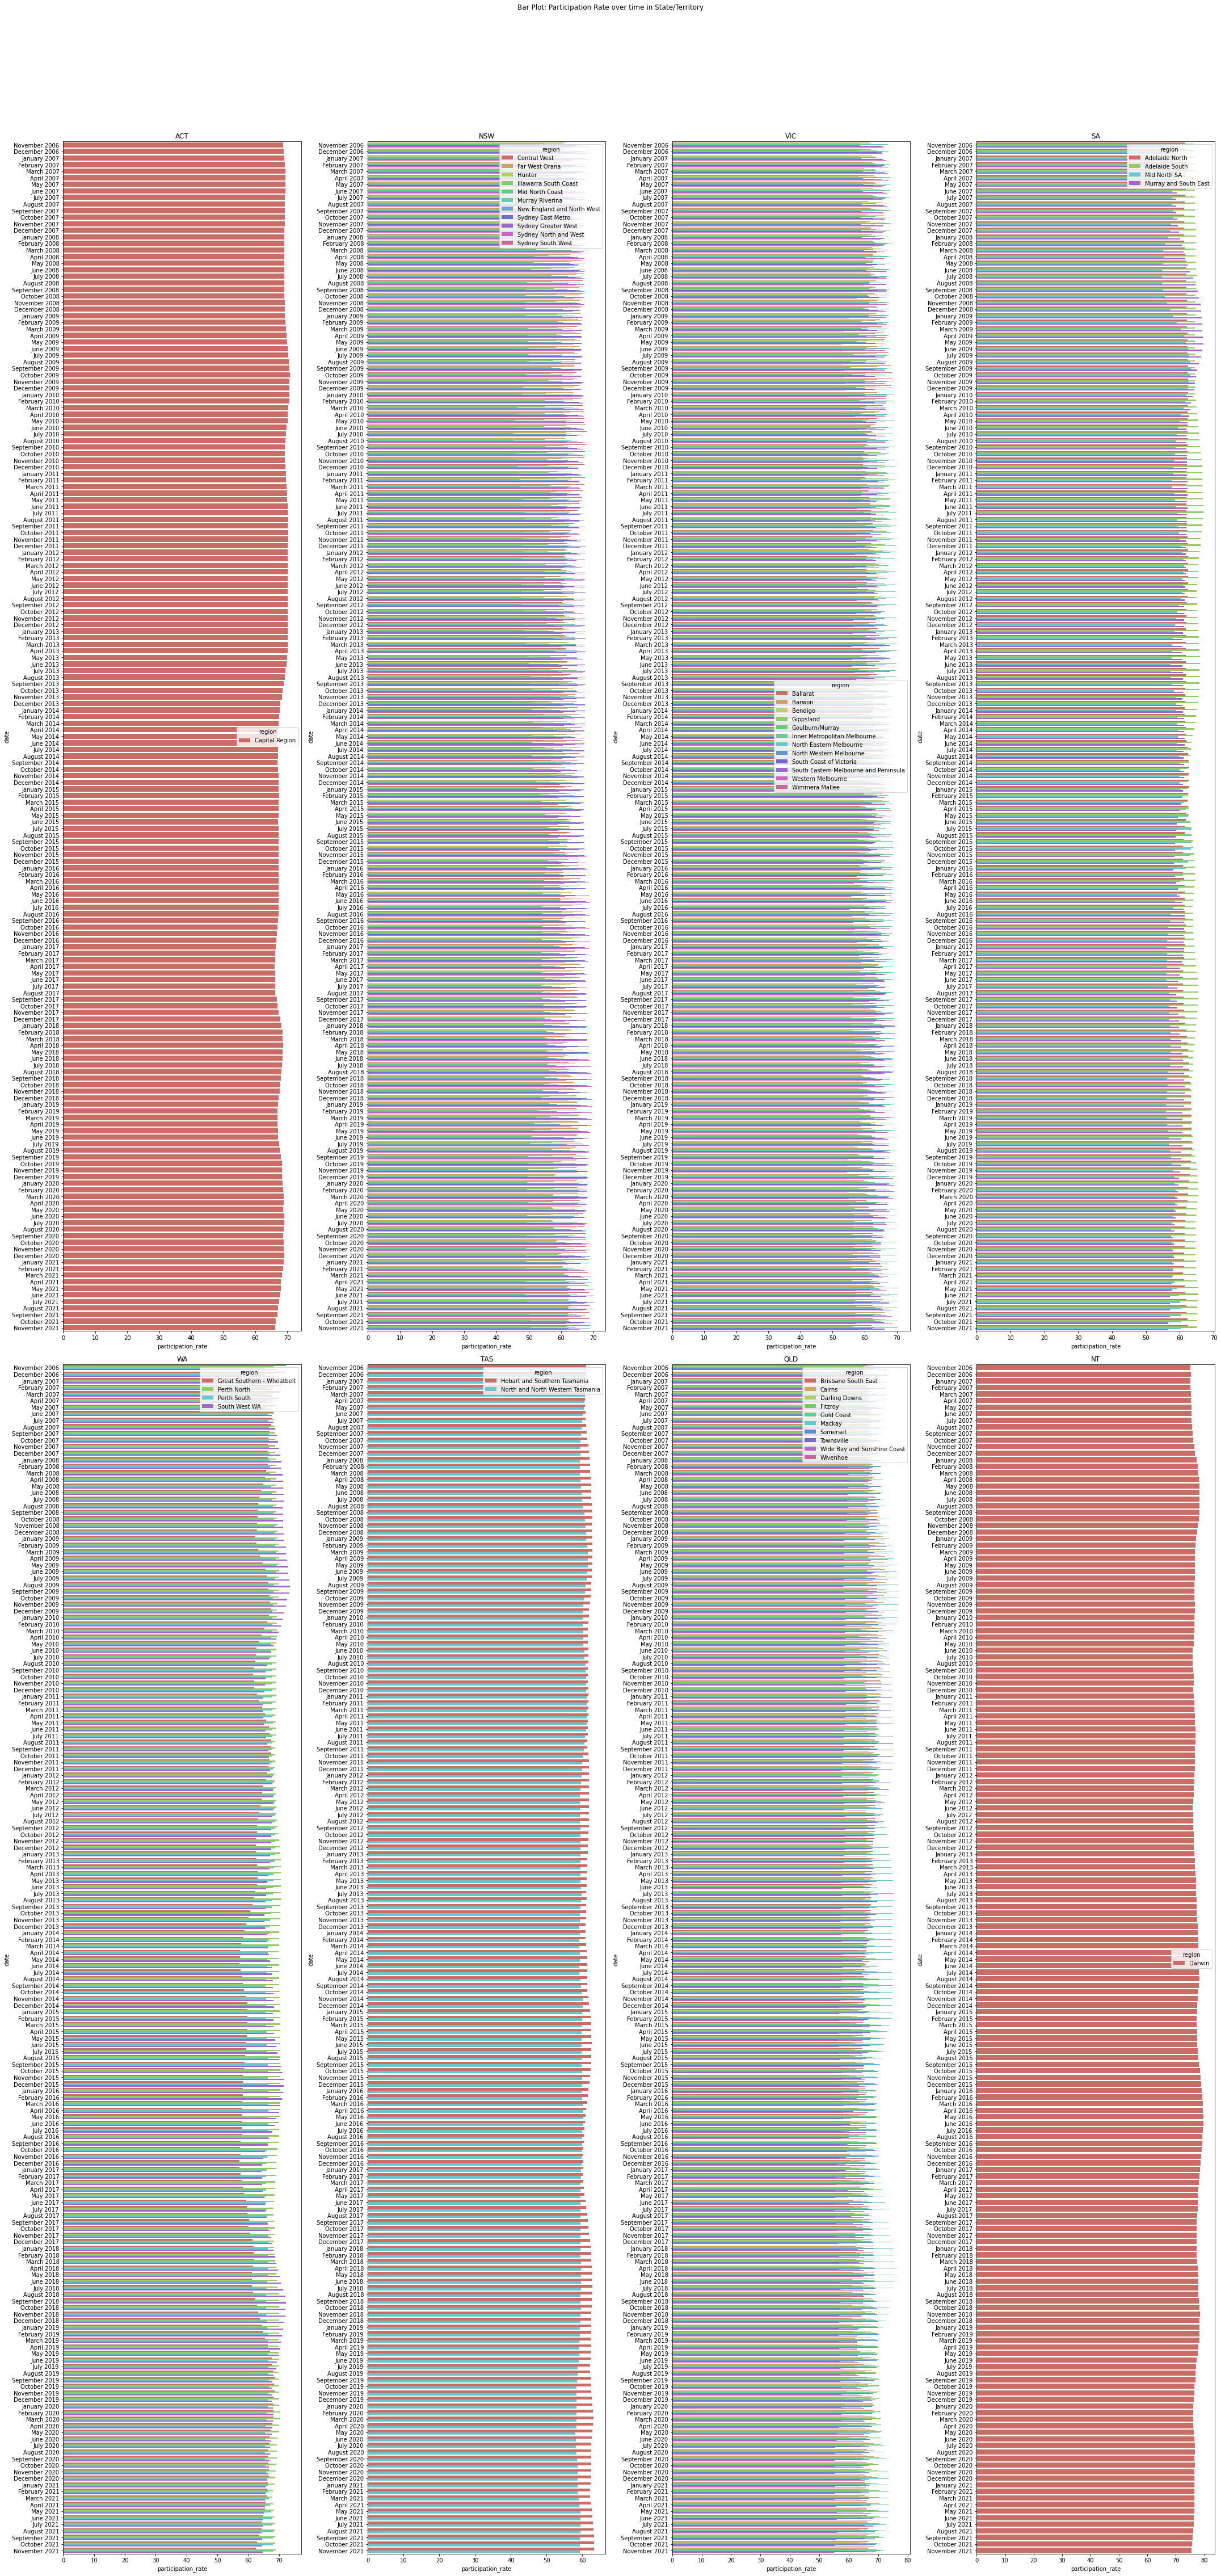

In [ ]:
fig, axes = plt.subplots(2, 4,figsize=(30,60))
fig.suptitle('Bar Plot: Participation Rate over time in State/Territory',y=1.05)

sb.barplot(x = 'participation_rate', y = 'date', hue='region', data=df_ACT, ax=axes[0,0],palette = 'hls').set_title('ACT')
sb.barplot(x = 'participation_rate', y = 'date', hue='region', data=df_NSW, ax=axes[0,1],palette = 'hls').set_title('NSW')
sb.barplot(x = 'participation_rate', y = 'date', hue='region', data=df_VIC, ax=axes[0,2],palette = 'hls').set_title('VIC')
sb.barplot(x = 'participation_rate', y = 'date', hue='region', data=df_SA, ax=axes[0,3],palette = 'hls').set_title('SA')
sb.barplot(x = 'participation_rate', y = 'date', hue='region', data=df_WA, ax=axes[1,0],palette = 'hls').set_title('WA')
sb.barplot(x = 'participation_rate', y = 'date', hue='region', data=df_TAS, ax=axes[1,1],palette = 'hls').set_title('TAS')
sb.barplot(x = 'participation_rate', y = 'date', hue='region', data=df_QLD, ax=axes[1,2],palette = 'hls').set_title('QLD')
sb.barplot(x = 'participation_rate', y = 'date', hue='region', data=df_NT, ax=axes[1,3],palette = 'hls').set_title('NT')

plt.tight_layout()

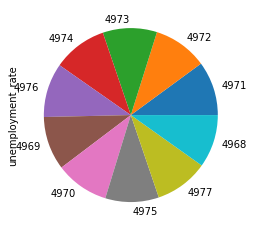

In [29]:
df_TAS['unemployment_rate'].nlargest(n=10).plot(kind = 'pie')

# ***Machine Learning Ananlysis for predicting employment & unemploument rate of ACT***

In [30]:
#import few library
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [31]:
for column in df_ACT.columns:                 #encoding string data
  if df_ACT[column].dtype==np.number:
    continue
  df_ACT[column]=LabelEncoder().fit_transform(df_ACT[column])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [32]:
df_ACT.head(5)  #check the encoding

,region,state_territory,date,unemployment_rate,participation_rate,employment_rate
1267,0,0,135,3.5,68.7,75.7
1268,0,0,30,3.5,68.9,75.9
1269,0,0,60,3.5,69.1,76.1
1270,0,0,45,3.4,69.2,76.4
1271,0,0,105,3.4,69.4,76.5


In [46]:
x = df_ACT[['region','date']]
y = df_ACT[['unemployment_rate','participation_rate','employment_rate']]

In [47]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20,random_state=1)

In [48]:
xtest.head(5) #test value check

,region,date
1384,0,24
1360,0,22
1380,0,9
1429,0,133
1302,0,153


In [49]:
ytest.head(5)

,unemployment_rate,participation_rate,employment_rate
1384,4.2,67.4,76.2
1360,4.7,67.1,75.0
1380,4.4,67.3,76.3
1429,3.5,68.8,78.7
1302,4.0,70.8,76.8


In [50]:
model_KNN = KNeighborsRegressor(n_neighbors=3)   # K Nearest Neighbors
model_DT = DecisionTreeRegressor()  # DecisionTreeRegressor
model_RF = RandomForestRegressor()  # RandomForestRegressor
model_LR = LinearRegression()       # LinearRegression

model_KNN.fit(xtrain,ytrain)
model_DT.fit(xtrain,ytrain)
model_RF.fit(xtrain,ytrain)
model_LR.fit(xtrain,ytrain)

LinearRegression()

In [51]:
model_KNN.predict(xtest.head(5))  #model prediction

array([[ 4.26666667, 67.26666667, 76.56666667],
       [ 4.23333333, 67.6       , 76.3       ],
       [ 4.33333333, 67.7       , 76.5       ],
       [ 4.        , 68.46666667, 77.        ],
       [ 3.4       , 69.56666667, 77.33333333]])

In [52]:
model_DT.predict(xtest.head(5))

array([[ 4.3, 67.3, 76.9],
       [ 4.1, 69.2, 76.7],
       [ 4.4, 67.3, 76.5],
       [ 4.2, 68.1, 77.8],
       [ 2.8, 69.1, 77.2]])

In [53]:
model_RF.predict(xtest.head(5))

array([[ 4.285, 67.085, 76.46 ],
       [ 4.026, 68.77 , 76.905],
       [ 4.379, 67.413, 76.256],
       [ 4.174, 68.279, 77.514],
       [ 3.21 , 69.147, 77.173]])

In [54]:
model_LR.predict(xtest.head(5))

array([[ 3.82199303, 68.74907188, 76.9632367 ],
       [ 3.82069641, 68.75479416, 76.96609211],
       [ 3.8122684 , 68.79198893, 76.98465227],
       [ 3.89265872, 68.437208  , 76.80761691],
       [ 3.9056249 , 68.37998527, 76.77906282]])

In [55]:
model_KNN.score(xtest,ytest) # prediction score for KNN

0.26573661048057345

In [56]:
model_DT.score(xtest,ytest)  # prediction score for Decision Tree

-0.06874485927182934

In [57]:
model_RF.score(xtest,ytest)  # prediction score for ramdom forest

0.19077911195568867

In [58]:
model_LR.score(xtest,ytest)  # prediction score for linear regression

-0.03142445620223644

# ***Comments: As my target was to get multiple outputs such as unemployment, participation and employment rate as a time based on the date and the region therefore the accuracy score is very poor. Because lower number of input variables.*** 
# ***If someone use single output such as only unemployment rate or employment rate or participation rate at a time and use rest of the variables as input it will incease the accuracy dramatically. As an example shown below:***

In [59]:
x1 = df_ACT[['region','date','employment_rate','participation_rate']]
y1 = df_ACT['unemployment_rate']
xtrain1,xtest1,ytrain1,ytest1 = train_test_split(x1,y1,test_size=0.20,random_state=1)
model_KNN1 = KNeighborsRegressor(n_neighbors=3) # K Neighbour
model_DT1 = DecisionTreeRegressor()  # DecisionTreeRegressor
model_RF1 = RandomForestRegressor()  # RandomForestRegressor
model_LR1 = LinearRegression()       # LinearRegression

model_KNN1.fit(xtrain1,ytrain1)
model_DT1.fit(xtrain1,ytrain1)
model_RF1.fit(xtrain1,ytrain1)
model_LR1.fit(xtrain1,ytrain1)

LinearRegression()

In [60]:
model_KNN1.predict(xtest1.head(5))

array([4.26666667, 4.23333333, 4.33333333, 3.83333333, 3.4       ])

In [61]:
model_DT1.predict(xtest1.head(5))

array([4.5, 4.7, 4.4, 3.6, 4. ])

In [62]:
model_RF1.predict(xtest1.head(5))

array([4.377, 4.551, 4.389, 3.639, 3.979])

In [63]:
model_LR1.predict(xtest1.head(5))

array([4.12162995, 4.27799332, 4.12975255, 3.66504337, 3.48562219])

In [64]:
model_KNN1.score(xtest1,ytest1)

0.23552702882324672

In [65]:
model_DT1.score(xtest1,ytest1)  # accuracy is increased

0.7497469402779056

In [66]:
model_RF1.score(xtest1,ytest1)  # accuracy is increased

0.7835252300542922

In [67]:
model_LR1.score(xtest1,ytest1)

0.37832126630205654

In [71]:
# test the prediction using an example
input_value = ['Capital Region', 'July 2022', 70, 75,]

In [73]:
input_value = pd.DataFrame(data=[input_value], columns =['region', 'date', 'employment_rate', 'participation_rate'])

In [74]:
input_value

,region,date,employment_rate,participation_rate
0,Capital Region,July 2022,70,75


In [75]:
for column in input_value.columns:                 #encoding string data
  if input_value[column].dtype==np.number:
    continue
  input_value[column]=LabelEncoder().fit_transform(input_value[column])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  


In [77]:
model_RF1.predict(input_value) # predicted value based on input

array([4.416])